In [1]:
# loading necessary packages
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
%matplotlib inline

# Data Exploration and Cleaning

In [2]:
# loading in the data
df = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')

In [3]:
# checking to see whether the data was loaded correctly
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [4]:
# renaming the 2 columns so that it makes a little more sense.
col_rename = {'X': 'Lat', 'Y': 'Lon'}
df = df.rename(columns=col_rename)

In [5]:
# dropping unnecessary columns
df = df.drop((['IncidntNum', 'Location', 'PdId', 'Descript']), axis = 1)

In [6]:
# sorting the dataframe by the date so that is starts on January 1, and ends on December 31.
df.sort_values(by=['Date', 'Category'], ascending=True, inplace=True)

In [7]:
# showing the first five rows to make sure that the date and category are ascending correctly
df.head()

,Category,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,Lat,Lon
108307,ARSON,Friday,01/01/2016 12:00:00 AM,16:56,SOUTHERN,"ARREST, BOOKED",MCCOPPIN ST / STEVENSON ST,-122.421749,37.771642
5,ASSAULT,Friday,01/01/2016 12:00:00 AM,21:35,NORTHERN,NONE,1700 Block of BUSH ST,-122.426077,37.788019
141,ASSAULT,Friday,01/01/2016 12:00:00 AM,02:04,TENDERLOIN,"ARREST, BOOKED",100 Block of TAYLOR ST,-122.410792,37.783695
142,ASSAULT,Friday,01/01/2016 12:00:00 AM,02:04,TENDERLOIN,"ARREST, BOOKED",100 Block of TAYLOR ST,-122.410792,37.783695
149,ASSAULT,Friday,01/01/2016 12:00:00 AM,02:15,TENDERLOIN,NONE,0 Block of 5THSTNORTH ST,-122.408649,37.784912


In [8]:
# making sure that the date is in the correct format
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
# setting the date to year/month/day
df['Date'] = df['Date'].dt.strftime('%Y/%m/%d')

In [10]:
# checking on the changes that I made to the dataframe
df.sample(5)

,Category,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,Lat,Lon
58745,WARRANTS,Tuesday,2016/07/26,11:28,SOUTHERN,"ARREST, BOOKED",0 Block of UNITEDNATIONS PZ,-122.414318,37.779944
52556,WEAPON LAWS,Tuesday,2016/07/05,15:11,RICHMOND,"ARREST, BOOKED",BUSH ST / BRODERICK ST,-122.441727,37.785967
73369,OTHER OFFENSES,Tuesday,2016/07/12,09:00,CENTRAL,NONE,800 Block of WASHINGTON ST,-122.407398,37.795083
87514,MISSING PERSON,Tuesday,2016/10/18,09:00,BAYVIEW,NONE,1200 Block of 3RD ST,-122.389518,37.772468
131161,LARCENY/THEFT,Saturday,2016/10/22,23:00,TARAVAL,NONE,3000 Block of 23RD AV,-122.479250,37.731827


In [11]:
# checking to see if there are any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150500 entries, 108307 to 111731
Data columns (total 9 columns):
Category      150500 non-null object
DayOfWeek     150500 non-null object
Date          150500 non-null object
Time          150500 non-null object
PdDistrict    150499 non-null object
Resolution    150500 non-null object
Address       150500 non-null object
Lat           150500 non-null float64
Lon           150500 non-null float64
dtypes: float64(2), object(7)
memory usage: 11.5+ MB


In [12]:
# there is only one missing value for the entire dataframe under the PdDistrict column. we will use a ffill.
df['PdDistrict'] = df['PdDistrict'].ffill()

In [13]:
# checking to see whether the missing value was filled or not. It was.
df['PdDistrict'].isnull().sum()

0

# SF Crime Data Analysis:

# Category

In [14]:
# counting the different categories withing the crime category column
catcount = pd.crosstab(index=df['Category'], columns='count')

In [15]:
# in the category column there are many different types of crime. 
catcount['count'].sort_values(ascending = False)

Category
LARCENY/THEFT                  40409
OTHER OFFENSES                 19599
NON-CRIMINAL                   17866
ASSAULT                        13577
VANDALISM                       8589
VEHICLE THEFT                   6419
WARRANTS                        5914
BURGLARY                        5802
SUSPICIOUS OCC                  5782
MISSING PERSON                  4338
DRUG/NARCOTIC                   4243
ROBBERY                         3299
FRAUD                           2635
SECONDARY CODES                 1841
TRESPASS                        1812
WEAPON LAWS                     1658
SEX OFFENSES, FORCIBLE           940
STOLEN PROPERTY                  882
RECOVERED VEHICLE                736
DISORDERLY CONDUCT               658
PROSTITUTION                     641
FORGERY/COUNTERFEITING           619
DRUNKENNESS                      465
DRIVING UNDER THE INFLUENCE      378
ARSON                            286
KIDNAPPING                       257
EMBEZZLEMENT                 

In [16]:
# there are a lot of crimes for the year 2016 that happened less than 1000 times. to make things easier on ourselves 
# we will look at only the crimes that have occurred more than 1000 times over the course of the year.
# LARCENY/THEFT                  40409
# OTHER OFFENSES                 19599
# NON-CRIMINAL                   17866
# ASSAULT                        13577
# VANDALISM                       8589
# VEHICLE THEFT                   6419
# WARRANTS                        5914
# BURGLARY                        5802
# SUSPICIOUS OCC                  5782
# MISSING PERSON                  4338
# DRUG/NARCOTIC                   4243
# ROBBERY                         3299
# FRAUD                           2635
# SECONDARY CODES                 1841
# TRESPASS                        1812
# WEAPON LAWS                     1658

In [17]:
# dropping the unnecessary columns from the dataframe
cat = catcount.drop(['TREA', 'PORNOGRAPHY/OBSCENE MAT', 'GAMBLING', 'BAD CHECKS', 'SEX OFFENSES, NON FORCIBLE', 'LOITERING',
              'FAMILY OFFENSES', 'EXTORTION', 'SUICIDE', 'BRIBERY', 'RUNAWAY', 'EMBEZZLEMENT', 'LIQUOR LAWS',
              'SEX OFFENSES, FORCIBLE', 'STOLEN PROPERTY', 'RECOVERED VEHICLE', 'DISORDERLY CONDUCT', 'PROSTITUTION',
               'FORGERY/COUNTERFEITING', 'DRUNKENNESS', 'DRIVING UNDER THE INFLUENCE', 'ARSON', 'KIDNAPPING'],
                axis = 0)

In [18]:
# looking at all of the clumns in the new dataframe.
cat.head(16)

col_0,count
Category,
ASSAULT,13577
BURGLARY,5802
DRUG/NARCOTIC,4243
FRAUD,2635
LARCENY/THEFT,40409
MISSING PERSON,4338
NON-CRIMINAL,17866
OTHER OFFENSES,19599
ROBBERY,3299


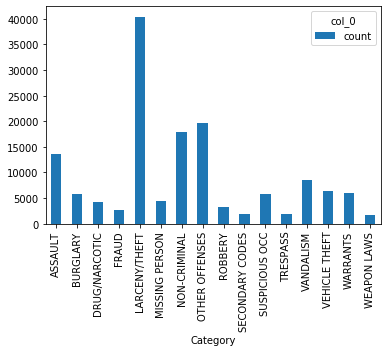

In [19]:
# after dropping everything that occured less than 1000 times over the course of the year, 
# we are left with 16 categories of crimes. Larceny/theft are the highest occuring crimes in SF for 2016.
cat.plot(kind='bar');

In [20]:
# Category Conlusion: 
# in San Francisco in the year 2016, you were most likely to be a victim of Larceny/Theft.

# DayOfWeek

In [21]:
# I want to check to see what day of the week crimes are most likely to occur. 
df['DayOfWeek'].value_counts()

Friday       23371
Saturday     22172
Thursday     21395
Wednesday    21332
Tuesday      21242
Monday       20783
Sunday       20205
Name: DayOfWeek, dtype: int64

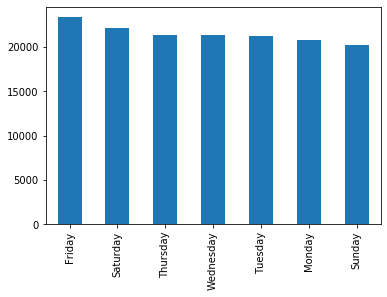

In [22]:
# plotting the data from above
df['DayOfWeek'].value_counts().plot(kind = 'bar');

In [23]:
# DayOfWeek Conclusion:
# Not surprisingly, Friday and Saturday (the weekend) are the days with the most crimes commited. 
# with the exception of these two days, the crime is fairly even across the rest of the week.


# Date

In [24]:
# knowing the dates that crimes occur the most will allow the police department to know when to staff appropriately 
date = df['Date'].value_counts()
date.head()

2016/01/01    558
2016/10/08    532
2016/04/01    525
2016/01/29    514
2016/12/14    507
Name: Date, dtype: int64

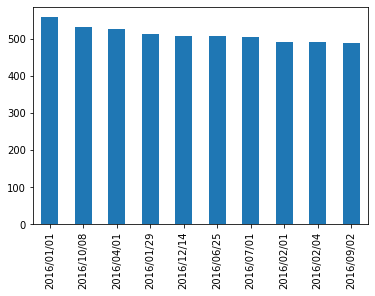

In [25]:
# here we can see the 10 days with the most amount of crime in SF. 
date.head(10).plot(kind = 'bar');

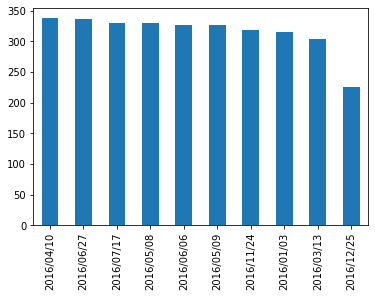

In [26]:
# here are the 10 days with the east amount of crime. 
date.tail(10).plot(kind = 'bar');

In [27]:
# Date Conclusion:
# I do not think it is a surprise that New Years is the day with the highest amount of crime. 3 days in January happen
# to appear in the top ten list.
# Again, I do not think it is a surprise that christmas is the day with the least amount of crime. 

# Time

In [28]:
# The time that a crime occurs is important to know for law enforcement officials, they can use this information
# to know not WHERE, but WHEN to best allocate their resources
time = df['Time'].value_counts()
time.head()

12:00    3842
00:01    3397
18:00    3165
19:00    2912
20:00    2902
Name: Time, dtype: int64

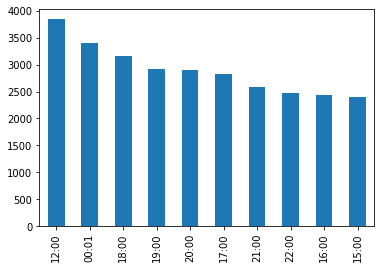

In [29]:
# this is a graph representing the hours when most crimes occur in a 24 hour period.

# military time
time.head(10).plot(kind = 'bar');

In [30]:
# Time Conclusion:
# crimes occur most often in the late afternoon to early night time.
# this is surprising to me because i would have assumed that most crimes would have happened in the early morning.

# PdDistrict

In [31]:
# a map of the various police districts can be found here:
# https://hoodline.com/2015/07/citywide-sfpd-redistricting-to-take-effect-sunday

In [32]:
# now lets take a look at which police department is called upon the most.
dist = df['PdDistrict'].value_counts()

In [33]:
# as we can clearly see from the numbers and graph below, the southern district is the most crime ridden.
dist.head(10)

SOUTHERN      28446
NORTHERN      20100
MISSION       19503
CENTRAL       17666
BAYVIEW       14303
INGLESIDE     11594
TARAVAL       11325
TENDERLOIN     9942
RICHMOND       8922
PARK           8699
Name: PdDistrict, dtype: int64

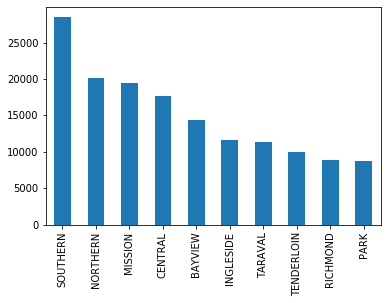

In [34]:
# This graph is a visual representation of the data above.
# the southern district is the most crime ridden.
dist.plot(kind = 'bar');

In [35]:
# PdDistrict Conclusion:
# After a very quick examination of the SFPD district map, its quite obvious that the crimes are happening in the 
# tourist areas of the city. The top four districts all border each other along the eastern side of the city where
# many popular tourist destinations such as the pier are located.

# Resolution

In [36]:
# the resolution is what happens when the complaintant is contacted by the police. 
# How was the complaint resolved?

In [37]:
res = df['Resolution']

In [38]:
# there are two main groups in the Resolution column. 
# we will focus on 'None' and 'Arrest/Booked' because they make up over 90% of the data
res.value_counts()

NONE                                      107780
ARREST, BOOKED                             39416
UNFOUNDED                                   1608
JUVENILE BOOKED                             1056
EXCEPTIONAL CLEARANCE                        371
ARREST, CITED                                144
CLEARED-CONTACT JUVENILE FOR MORE INFO        58
NOT PROSECUTED                                22
LOCATED                                       20
PSYCHOPATHIC CASE                             17
JUVENILE CITED                                 3
COMPLAINANT REFUSES TO PROSECUTE               2
JUVENILE DIVERTED                              2
PROSECUTED BY OUTSIDE AGENCY                   1
Name: Resolution, dtype: int64

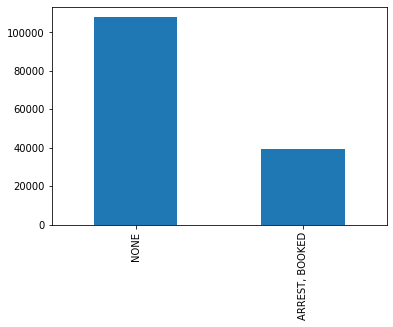

In [39]:
# Graph of the two main categories within Resolution
reso = res.value_counts().head(2)
reso.plot(kind = 'bar');

In [40]:
# Resolution Conclusion:
# As you can see from looking at the graph, most of the time when the police show up, nothing happens at all. 
# the vast majority of complaints end up in the "none" column. This means there is a lot of wasted time and effort
# on the police departments part. Around 70% of the time that police were called in 2016, the police left without 
# doing anything. 

# Amount of Crimes Per Month

In [41]:
# Which month has the most amount of crime ?

Total amount of crimes in January 2016: 12946


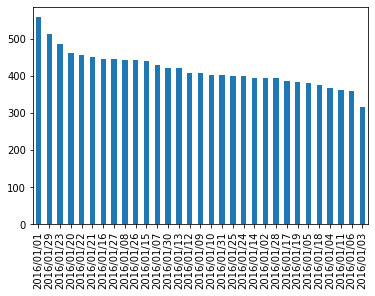

In [42]:
filtdf1 = df[(df['Date'] >= '2016/01/01') & (df['Date'] <='2016/01/31')]
filtdf1['Date'].value_counts().plot(kind = 'bar');
print("Total amount of crimes in January 2016:", filtdf1['Date'].value_counts().sum())

# January
# Top 3 days for crime:
# Jan 1, 29, 23
# Lowest 3 days for crime:
# Jan 11, 6, 3

Total amount of crimes in February 2016: 12092


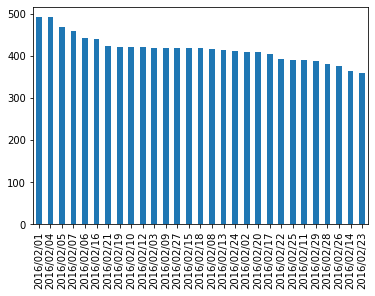

In [43]:
filtdf2 = df[(df['Date'] >= '2016/02/01') & (df['Date'] <='2016/02/31')]
filtdf2['Date'].value_counts().plot(kind = 'bar');
print("Total amount of crimes in February 2016:", filtdf2['Date'].value_counts().sum())

# February
# Top 3 days for crime:
# Feb 1, 4, 7
# Lowest 3 days for crime:
# Feb 26, 14, 23

Total amount of crimes in March 2016: 12362


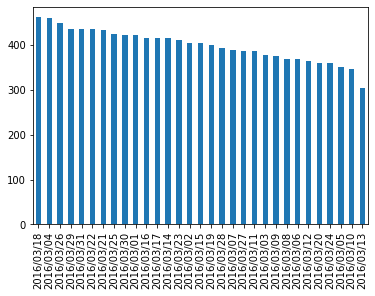

In [44]:
filtdf3 = df[(df['Date'] >= '2016/03/01') & (df['Date'] <='2016/03/31')]
filtdf3['Date'].value_counts().plot(kind = 'bar');
print("Total amount of crimes in March 2016:", filtdf3['Date'].value_counts().sum())


# March
# Top 3 days for crime:
# Mar 18, 4, 26
# Lowest 3 days for crime:
# Mar 5, 10, 13

Total amount of crimes in April 2016: 12317


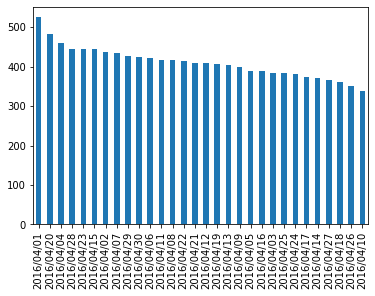

In [45]:
filtdf4 = df[(df['Date'] >= '2016/04/01') & (df['Date'] <='2016/04/31')]
filtdf4['Date'].value_counts().plot(kind = 'bar');
print("Total amount of crimes in April 2016:", filtdf4['Date'].value_counts().sum())

# April
# Top 3 days for crime:
# Apr 1, 20, 4
# Lowest 3 days for crime:
# Apr 18, 26, 10

In [46]:
# # to save space I have written the code but I have not entered it
# # May
filtdf5 = df[(df['Date'] >= '2016/05/01') & (df['Date'] <='2016/05/31')]
# filtdf5['Date'].value_counts().plot(kind = 'bar');
print("Total amount of crimes in May 2016:", filtdf5['Date'].value_counts().sum());
# # June
filtdf6 = df[(df['Date'] >= '2016/06/01') & (df['Date'] <='2016/06/31')]
# filtdf6['Date'].value_counts().plot(kind = 'bar');
print("Total amount of crimes in June 2016:", filtdf6['Date'].value_counts().sum())
# # July
filtdf7 = df[(df['Date'] >= '2016/07/01') & (df['Date'] <='2016/07/31')]
# filtdf7['Date'].value_counts().plot(kind = 'bar');
print("Total amount of crimes in July 2016:", filtdf7['Date'].value_counts().sum())
# # August
filtdf8 = df[(df['Date'] >= '2016/08/01') & (df['Date'] <='2016/08/31')]
# filtdf8['Date'].value_counts().plot(kind = 'bar');
print("Total amount of crimes in August 2016:", filtdf8['Date'].value_counts().sum())
# # September
filtdf9 = df[(df['Date'] >= '2016/09/01') & (df['Date'] <='2016/09/31')]
# filtdf9['Date'].value_counts().plot(kind = 'bar');
print("Total amount of crimes in September 2016:", filtdf9['Date'].value_counts().sum())
# # October
filtdf10 = df[(df['Date'] >= '2016/10/01') & (df['Date'] <='2016/10/31')]
# filtdf10['Date'].value_counts().plot(kind = 'bar');
print("Total amount of crimes in October 2016:", filtdf10['Date'].value_counts().sum())
# # November
filtdf11 = df[(df['Date'] >= '2016/11/01') & (df['Date'] <='2016/11/31')]
# filtdf11['Date'].value_counts().plot(kind = 'bar');
print("Total amount of crimes in November 2016:", filtdf11['Date'].value_counts().sum())
# # December
filtdf12 = df[(df['Date'] >= '2016/12/01') & (df['Date'] <='2016/12/31')]
# filtdf12['Date'].value_counts().plot(kind = 'bar');
print("Total amount of crimes in December 2016:", filtdf12['Date'].value_counts().sum())

Total amount of crimes in May 2016: 12713
Total amount of crimes in June 2016: 12076
Total amount of crimes in July 2016: 12166
Total amount of crimes in August 2016: 12428
Total amount of crimes in September 2016: 12473
Total amount of crimes in October 2016: 13331
Total amount of crimes in November 2016: 12670
Total amount of crimes in December 2016: 12926


In [47]:
# Date Conclusion:
# October, December, and January are the months with the most crime. This is the height of holiday season and is probably 
# the reason for this

# Data Analysis Conclusion

In the year 2016, San Francisco saw 150,000 reported crimes. 
-27% (40409/150000) crimes reported were in the larceny/theft category. Not surprisingly, the weekend (Friday and Saturday) sees the most amount of crime, accounting for 30% of the crime in these 2 days. 
-New Years Day is the single day with the most amount of crimes by a large margin. New Years Day accounts for 0.3% (558 crimes) of all crimes throughout the entire year, which is quite a lot considering that if you averaged out the 150000 crimes for 366 days (leap year), it equals 0.2% (409 crimes). Almost 150 more!
-12:00 noon sees the most amount of crime happening. "Most crimes commited in big cities occur during the day, while more violent offenses happen more frequently at night, according to a new study." This makes sense seeing that the vast majority of crimes are minor larceny/theft. the study can be found here: https://www.usnews.com/news/cities/articles/2019-06-12/study-finds-crime-in-big-cities-is-more-likely-during-the-day.
-October is the month that has the most reported crimes. 


# Data Decomposition (Checking for Seasonality):

# Data Exploration and Cleaning

In [48]:
# in order to fully understand crime within san francisco, i will perform a decomposition of the data and check 
# for seasonality. 

# importing necessary packages
import sklearn
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm 

# setting the algorithms to usable names
le = LabelEncoder()

In [49]:
# dropping unnecessary columns
ts1 = df.drop(['Address', 'Lat', 'Lon'], axis = 1)

In [50]:
# setting the date to date time
ts1['Date'] = pd.to_datetime(df['Date'])

In [51]:
# setting the date to 'yyyy/mm/dd' format
ts1['Date'] = ts1['Date'].dt.strftime('%Y/%m/%d')

In [52]:
# in order to graph our time series we will need to turn the categorical data into numbers
ts1['Category'] = le.fit_transform(ts1['Category'])

In [53]:
# making sure that the label encoding worked
ts1['Category'].head()

108307    0
5         1
141       1
142       1
149       1
Name: Category, dtype: int64

In [54]:
# the classes within the label endoded column
le.classes_

array(['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
       'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE',
       'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION',
       'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING',
       'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING',
       'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES',
       'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE',
       'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES, FORCIBLE',
       'SEX OFFENSES, NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE',
       'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT',
       'WARRANTS', 'WEAPON LAWS'], dtype=object)

In [55]:
# making sure that it worked
ts1.head(2)

,Category,DayOfWeek,Date,Time,PdDistrict,Resolution
108307,0,Friday,2016/01/01,16:56,SOUTHERN,"ARREST, BOOKED"
5,1,Friday,2016/01/01,21:35,NORTHERN,NONE


In [56]:
# checking out the data types and missing values
ts1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150500 entries, 108307 to 111731
Data columns (total 6 columns):
Category      150500 non-null int64
DayOfWeek     150500 non-null object
Date          150500 non-null object
Time          150500 non-null object
PdDistrict    150500 non-null object
Resolution    150500 non-null object
dtypes: int64(1), object(5)
memory usage: 8.0+ MB


            Crime Per Day
Date                     
2016/09/10            429
2016/01/24            399
2016/12/27            438
2016/03/16            416
2016/06/12            402
2016/10/28            456
2016/10/02            365
2016/01/06            360
2016/08/05            443
2016/03/20            360


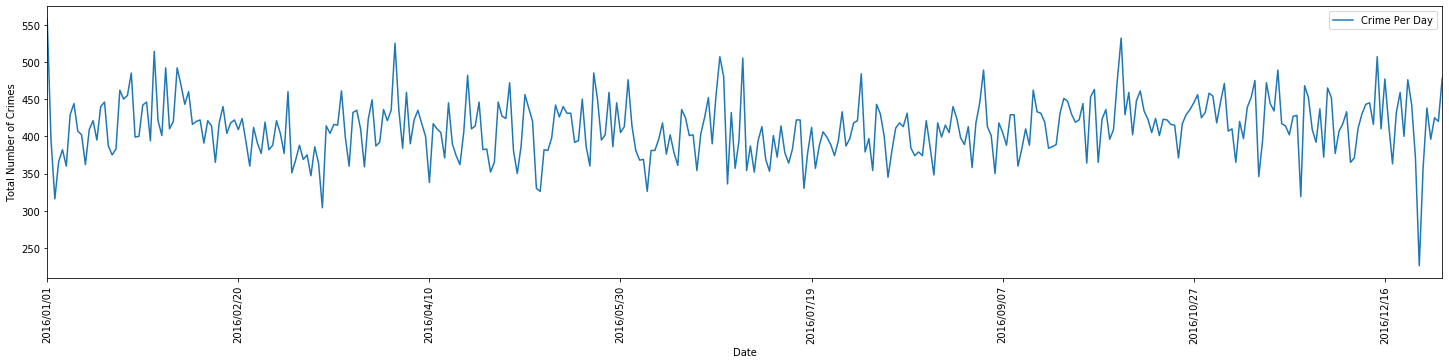

In [57]:
# this is a graph of the amount of crimes happening per day over the course of a year. 
grouped_cat = ts1.groupby('Date').agg({'Category': ['count']})

# rename columns
grouped_cat.columns = ['Crime Per Day']

# printing a sample of the data and also graphing out the data onto a large plot thats easy to read
print(grouped_cat.sample(10))
grouped_cat.plot(figsize = (25,5));
plt.xticks(rotation = 90);
plt.ylabel('Total Number of Crimes');

In [58]:
# reset index to get the Date column back
grouped_cat = grouped_cat.reset_index('Date')
grouped_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
Date             366 non-null object
Crime Per Day    366 non-null int64
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


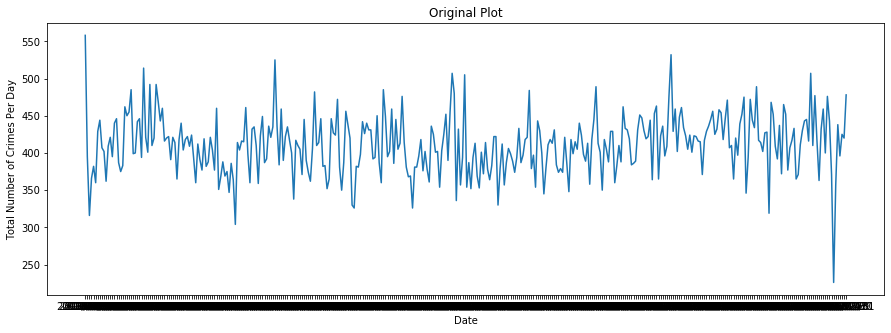

In [59]:
# there is so much data that the labels are cluttered. 
# The dates range from 1/1/2016-12/1/2016.
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Number of Crimes Per Day')
ax1.set_title('Original Plot')
ax1.plot('Date', 'Crime Per Day', data = grouped_cat);

In [60]:
# there is a lot of data to go over in this data set. I wanted to see what it would look like with only 50% of the data
one_half = grouped_cat.sample(frac = .50, random_state = np.random.randint(100))

In [61]:
# checking to see if it worked
one_half.head()

,Date,Crime Per Day
271,2016/09/28,444
326,2016/11/22,427
322,2016/11/18,489
254,2016/09/11,360
302,2016/10/29,425


In [62]:
# here we can see there is far less data than before
one_half.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 271 to 336
Data columns (total 2 columns):
Date             183 non-null object
Crime Per Day    183 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.3+ KB


In [63]:
# Getting the dataframe ready to be plotted
one_half.index.name = None
one_half = one_half.sort_values(by = ['Date'], ascending = True)
one_half.head()

,Date,Crime Per Day
3,2016/01/04,366
6,2016/01/07,429
8,2016/01/09,407
11,2016/01/12,409
12,2016/01/13,421


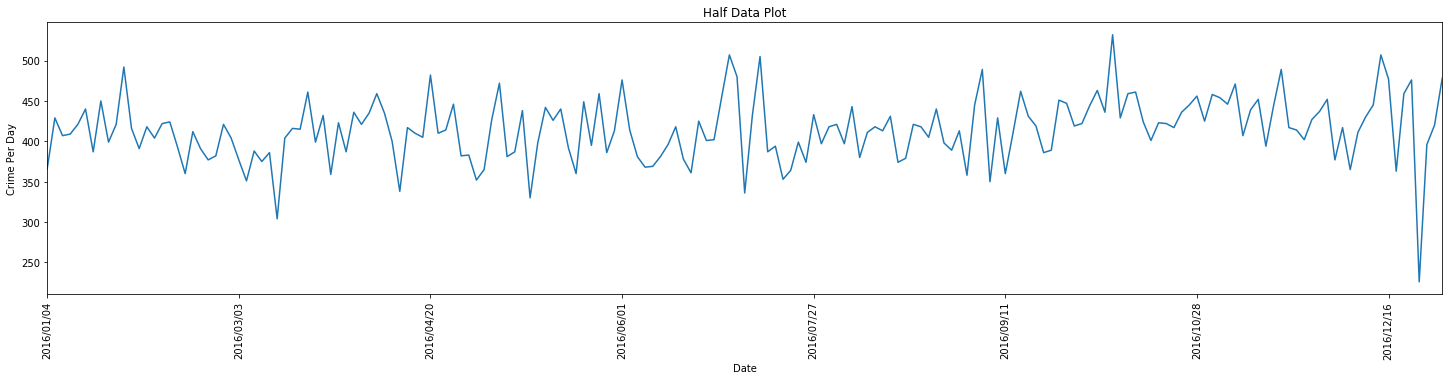

In [64]:
# plotting out the half data DataFrame
axes = one_half.plot('Date', 'Crime Per Day', legend = False, title = 'Half Data Plot', figsize = (25,5));
axes.legend = None
axes.set_ylabel('Crime Per Day')
plt.xticks(rotation = 90);


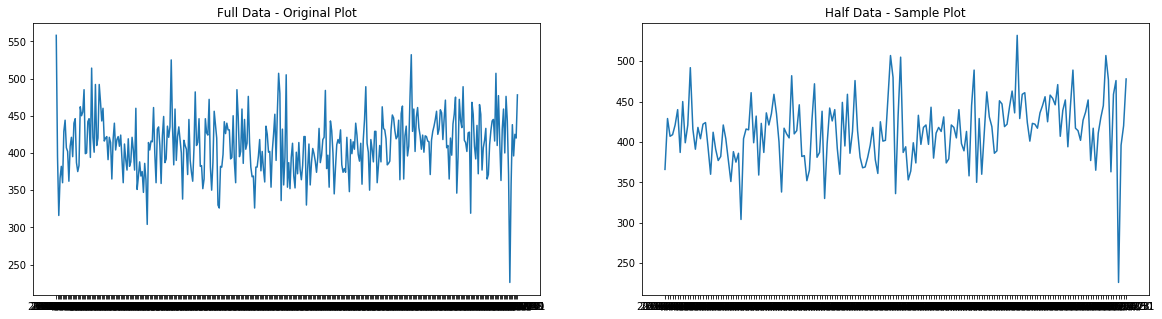

In [65]:
# plotting the two graphs side by side 
# notice that the general shape is the same but it is a lot less dense
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5));
axes[0].plot('Date', 'Crime Per Day', data = grouped_cat);
axes[0].set_title('Full Data - Original Plot');
axes[1].plot('Date', 'Crime Per Day', data = one_half);
axes[1].set_title('Half Data - Sample Plot');

In [66]:
# setting the window for the rolling mean to 30 because there are 30 days in a month
# the first 30 rows are missing accoiunting for an entire month. this is used to calculate the rolling mean for the 
# rest of the months in the year.
grouped_cat['Rolling Mean'] = grouped_cat['Crime Per Day'].rolling(window = 30).mean()
grouped_cat.head(30)

,Date,Crime Per Day,Rolling Mean
0,2016/01/01,558,NaN
1,2016/01/02,395,NaN
2,2016/01/03,316,NaN
3,2016/01/04,366,NaN
4,2016/01/05,382,NaN
5,2016/01/06,360,NaN
6,2016/01/07,429,NaN
7,2016/01/08,444,NaN
8,2016/01/09,407,NaN
9,2016/01/10,402,NaN


In [67]:
# checking for missing data and data types
grouped_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 3 columns):
Date             366 non-null object
Crime Per Day    366 non-null int64
Rolling Mean     337 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [68]:
# dropping the missing data from the DataFrame
grouped_cat.dropna(inplace = True)

In [69]:
# the missing data is taken care of 
grouped_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 29 to 365
Data columns (total 3 columns):
Date             337 non-null object
Crime Per Day    337 non-null int64
Rolling Mean     337 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.5+ KB


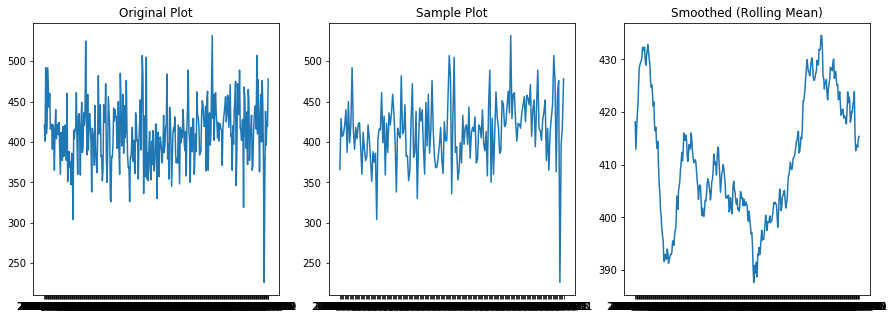

In [70]:
# plotting all of our plots together
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5));
axes[0].plot('Date', 'Crime Per Day', data = grouped_cat);
axes[0].set_title('Original Plot');
axes[1].plot('Date', 'Crime Per Day', data = one_half);
axes[1].set_title('Sample Plot');
axes[2].plot('Date', 'Rolling Mean', data = grouped_cat);
axes[2].set_title('Smoothed (Rolling Mean)');

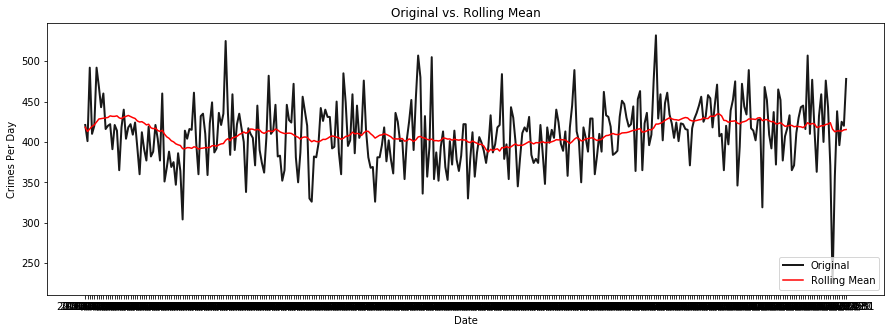

In [71]:
# this graph shows the relationship between the original data set and the rolling mean 
fig = plt.figure(figsize = (15,5));
ax = fig.add_subplot(111);
ax.plot(grouped_cat['Date'], grouped_cat['Crime Per Day'], color = (0, 0, 0), linewidth = 2, alpha = .9, label = 'Original');
ax.plot(grouped_cat['Date'], grouped_cat['Rolling Mean'], color = (1, 0, 0), label = 'Rolling Mean');
ax.set_title('Smoothed (Rolling Mean)');
ax.set_title('Original vs. Rolling Mean');
ax.set_xlabel('Date');
ax.set_ylabel('Crimes Per Day');
ax.legend(loc = 'lower right');

In [72]:
# setting the date to date time so that it can be used for a decomposition model
grouped_cat['Date'] = pd.to_datetime(grouped_cat['Date'])
one_half['Date'] = pd.to_datetime(one_half['Date'])

# getting the data frame ready for the model
decomp = grouped_cat

# setting the date as the index allows the decomposition model to process the data
decomp = decomp.set_index('Date')
decomp.head()

,Crime Per Day,Rolling Mean
Date,,
2016-01-30,421,418.166667
2016-01-31,401,412.933333
2016-02-01,492,416.166667
2016-02-02,410,419.300000
2016-02-03,420,421.100000


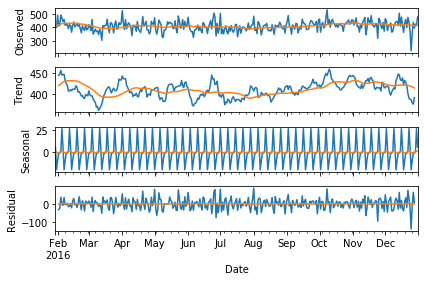

In [73]:
#Additive is used when the seasonality variation is constant over time as opposed to increasing or decreasing
df_decomp = sm.tsa.seasonal_decompose(decomp, model='additive')
df_decomp.plot();

# Blue = Original data
# orange = roling mean

# Decomposition Conclusion

OBSEERVED = the data with nothing done to it;
TREND = very constant over the course of the year it is neither increasing or decreasing;
SEASONALITY = the decompose notices patterns in the data. there is very high seasonality;
RESIDUAL = is the random variation in the series. the randomness is pretty steady as you can see with the rolling 
mean hovering around 0;

# SF Crime Classification:

In [74]:
# This section will go over classification and will predict which police districts will be called upon

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from math import sqrt
from sklearn.metrics import accuracy_score
ss = StandardScaler()

In [76]:
# uploading the data and setting it to a usable name
c = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')
c.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [77]:
# setting the date to date time 
c['Date'] = pd.to_datetime(c['Date'])
# setting the date to year/month/day|
c['Date'] = c['Date'].dt.strftime('%Y/%m/%d')

In [78]:
# checking the data types and if there are any missing values
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 13 columns):
IncidntNum    150500 non-null int64
Category      150500 non-null object
Descript      150500 non-null object
DayOfWeek     150500 non-null object
Date          150500 non-null object
Time          150500 non-null object
PdDistrict    150499 non-null object
Resolution    150500 non-null object
Address       150500 non-null object
X             150500 non-null float64
Y             150500 non-null float64
Location      150500 non-null object
PdId          150500 non-null int64
dtypes: float64(2), int64(2), object(9)
memory usage: 14.9+ MB


In [79]:
# there is only one missing value so we will use a forward fill
c['PdDistrict'] = c['PdDistrict'].ffill()

In [80]:
# checking for any missing values
c.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

In [81]:
# dropping unnecessary columns and rearranging the columns so the PdDistrict is first
cl = c.drop(columns = ['IncidntNum','Address', 'Location', 'PdId', 'Descript'])
cl = cl[['PdDistrict', 'Category', 'DayOfWeek', 'Date', 'Time', 'Resolution', 'X', 'Y']]
cl.head(1)

,PdDistrict,Category,DayOfWeek,Date,Time,Resolution,X,Y
0,SOUTHERN,WEAPON LAWS,Friday,2016/01/29,11:00,"ARREST, BOOKED",-122.403405,37.775421


In [82]:
# in order to graph categorical data, it needs to be changed into numbers first
cl['PdDistrict'] = le.fit_transform(cl['PdDistrict'])
cl['Category'] = le.fit_transform(cl['Category'])
cl['DayOfWeek'] = le.fit_transform(cl['DayOfWeek'])
cl['Date'] = le.fit_transform(cl['Date'])
cl['Time'] = le.fit_transform(cl['Time'])
cl['Resolution'] = le.fit_transform(cl['Resolution'])


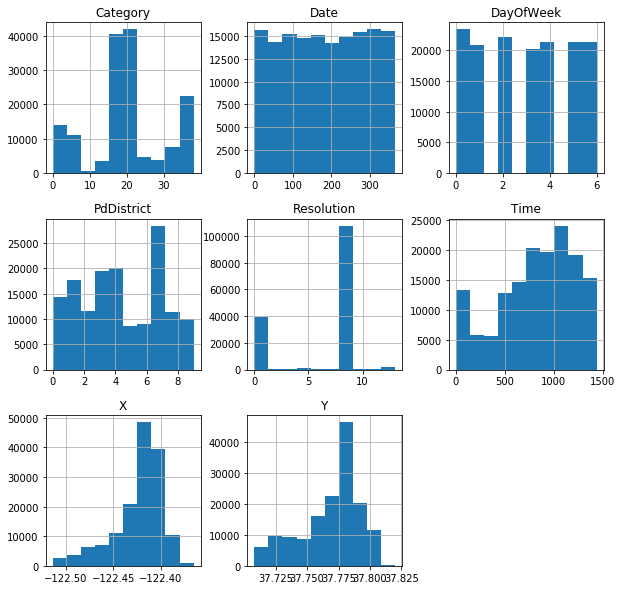

In [83]:
#now we will check to see if the data is normally distributed.
cl.hist(figsize=(10,10));

In [84]:
cl.head()

,PdDistrict,Category,DayOfWeek,Date,Time,Resolution,X,Y
0,7,38,0,28,659,0,-122.403405,37.775421
1,7,38,0,28,659,0,-122.403405,37.775421
2,0,37,1,115,898,0,-122.388856,37.729981
3,9,20,5,4,1429,9,-122.412971,37.785788
4,3,20,0,0,29,9,-122.419672,37.765050


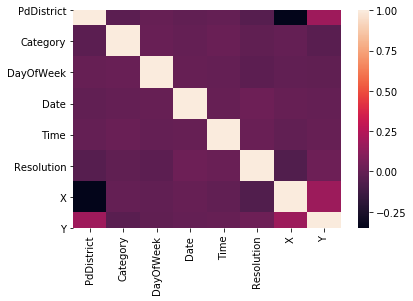

In [85]:
# to check the data for correlations a heat map is used.
#Visualizing the correlation between the features and PdDistrict, as well as features correlated amongst themselves.
sns.heatmap(cl.corr());

In [86]:
# After checking both the heat map and the correlation plot below, nothing seems to be highly correlated with each other
cl.corr()

,PdDistrict,Category,DayOfWeek,Date,Time,Resolution,X,Y
PdDistrict,1.000000,-0.028443,0.007342,-0.009856,-0.000142,-0.045351,-0.349505,0.180116
Category,-0.028443,1.000000,0.009243,0.003677,0.016328,-0.014251,0.002835,-0.034559
DayOfWeek,0.007342,0.009243,1.000000,0.008647,0.003524,-0.024186,-0.007472,-0.014285
Date,-0.009856,0.003677,0.008647,1.000000,0.005905,0.029074,0.005564,0.003674
Time,-0.000142,0.016328,0.003524,0.005905,1.000000,0.015787,-0.012098,0.005845
Resolution,-0.045351,-0.014251,-0.024186,0.029074,0.015787,1.000000,-0.062529,0.026297
X,-0.349505,0.002835,-0.007472,0.005564,-0.012098,-0.062529,1.000000,0.176721
Y,0.180116,-0.034559,-0.014285,0.003674,0.005845,0.026297,0.176721,1.000000


In [87]:
# setting our x and y for the train test split
x = cl.drop('PdDistrict', axis = 1)
y = np.array(cl.PdDistrict).reshape(-1, 1)

In [88]:
# training the data on 70% of the data and testing on 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 40, stratify = y)

In [89]:
# using a standard scaler to transform the data so that the data is evenly distributed around 0 with a standard 
# deviation of 1 
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [90]:
# logistic regression is used to measure the accuracy of our train and test data. 
# it is used mainly for predicting the values of categorical data
logR = LogisticRegression(class_weight='balanced', random_state=0, solver='saga', multi_class='multinomial' )

In [91]:
# fitting the logistic regression model to the training data and predicting our x_test data.
logR.fit(x_train, y_train)
predictions = logR.predict(x_test)

/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [92]:
# printing the classification report as well as the accuracy score. 
print(classification_report(y_test, predictions))
print('Accuracy Score:', round(accuracy_score(y_test, predictions)*100, 2), '%')

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      4291
           1       0.93      0.88      0.90      5300
           2       0.89      0.89      0.89      3478
           3       0.87      0.89      0.88      5851
           4       0.90      0.81      0.85      6030
           5       0.78      0.86      0.82      2610
           6       0.87      0.89      0.88      2677
           7       0.96      0.81      0.88      8533
           8       0.92      0.91      0.92      3397
           9       0.63      0.98      0.77      2983

   micro avg       0.87      0.87      0.87     45150
   macro avg       0.87      0.89      0.87     45150
weighted avg       0.89      0.87      0.88     45150

Accuracy Score: 87.3 %


# Categorical Conclusion

After cleaning and examining the data, I was able to run a train test split, where 70% of the data was used for training, and 30% was used for testing. I then fit a logistic regression model onto our data where I could then predict our PdDistrict column. 
Given the data for SF crimes in 2016, I was able to predict which districts will be affected the most with an accuracy of 87.3%.  